In [1]:
import sys
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sys.path.insert(1, "../gapfilling/scripts/")

In [3]:
from Gapfilling import *
from modelseed_gapfilling import *

In [4]:
# Setting gurobi as solver
cobra_config = cobra.Configuration()
cobra_config.solver = "gurobi"

In [5]:
# Loading reference models
# L. lactis
l_lactis_ref = read_sbml_model("models/references/iNF517.xml")
# P. putida
p_putida_ref = read_sbml_model("models/references/iJN1463.xml")
# E. coli
e_coli_ref = read_sbml_model("models/references/iML1515.xml")

Using license file /home/fco/gurobi.lic
Academic license - for non-commercial use only - expires 2021-08-10


In [78]:
# Loading strain-specific models
strain_files = []
strain_dir = "models/strains/"

for file in glob.iglob(strain_dir + "*.xml"):
    strain_files.append(file)
    
strain_names = [file[15:-4] for file in strain_files]

strain_models = []
for i in range(len(strain_files)):
    strain_models.append(read_sbml_model(strain_files[i]))
    # naming models
    strain_models[i].id = strain_names[i]
    
print("There are " + str(len(strain_models)) + " models.")

'' is not a valid SBML 'SId'.
'' is not a valid SBML 'SId'.
'' is not a valid SBML 'SId'.
'' is not a valid SBML 'SId'.
'' is not a valid SBML 'SId'.
'' is not a valid SBML 'SId'.
'' is not a valid SBML 'SId'.
'' is not a valid SBML 'SId'.
'' is not a valid SBML 'SId'.
'' is not a valid SBML 'SId'.
'' is not a valid SBML 'SId'.
'' is not a valid SBML 'SId'.
'' is not a valid SBML 'SId'.
'' is not a valid SBML 'SId'.
'' is not a valid SBML 'SId'.
'' is not a valid SBML 'SId'.
'' is not a valid SBML 'SId'.
'' is not a valid SBML 'SId'.
'' is not a valid SBML 'SId'.
'' is not a valid SBML 'SId'.
'' is not a valid SBML 'SId'.
'' is not a valid SBML 'SId'.
'' is not a valid SBML 'SId'.
'' is not a valid SBML 'SId'.
'' is not a valid SBML 'SId'.
'' is not a valid SBML 'SId'.
'' is not a valid SBML 'SId'.
'' is not a valid SBML 'SId'.
'' is not a valid SBML 'SId'.
'' is not a valid SBML 'SId'.
'' is not a valid SBML 'SId'.
'' is not a valid SBML 'SId'.
'' is not a valid SBML 'SId'.
'' is not 

There are 43 models.


In [79]:
# all models have biomass as objective function
# let's check fluxes
IDs = [x.id for x in strain_models]
Flux_values = [x.optimize().objective_value for x in strain_models]
Reactions = [len(x.reactions) for x in strain_models]

d = {'Strain': IDs, 'Flux Value': Flux_values, 'Number of Reactions': Reactions}
df = pd.DataFrame(d)
df

/home/fco/miniconda3/envs/TFM/lib/python3.8/site-packages/cobra/util/solver.py:430: UserWarning: solver status is 'infeasible'
  warn("solver status is '{}'".format(status), UserWarning)


,Strain,Flux Value,Number of Reactions
0,NZ_CP066300.1,0.000000,729
1,NZ_CP015899.1,NaN,694
2,NZ_CP015900.1,NaN,699
3,NZ_AP018499.1,0.000000,693
4,NC_020450.1,0.000000,735
5,NZ_CP015894.1,NaN,716
6,NZ_CP015901.1,0.000000,716
7,NZ_LT599049.1,0.000000,732
8,NC_008527.1,NaN,706
9,NZ_CP015902.1,0.000000,732


We can note that all models but three have a null flux or the calculations are infeasible (NaN). The models with a positive flux are the following:

In [80]:
df.loc[df['Flux Value'] > 0]

,Strain,Flux Value,Number of Reactions
20,NZ_CM007353.1,0.026255,739
32,NC_022369.1,0.042635,743
35,NC_017949.1,0.042635,749


In [81]:
# Comparing with reference
print('ID: ', l_lactis_ref.id)
print('Flux Value: ', l_lactis_ref.optimize().objective_value)
print('Number of Reactions: ', len(l_lactis_ref.reactions))

ID:  iNF517
Flux Value:  0.80120692738441
Number of Reactions:  754


Both reference models and multi-strain GEM have a poor performance. This is caused by the severe constraints imposed in the reference model. We will rise the uptake and secretion bounds of the models to "open" them.

In [82]:
# reference
# uptake (except Glc)
uptake = ['EX_4abz_e', 'EX_ade_e', 'EX_ala__L_e', 'EX_arg__L_e', 'EX_asp__L_e', 'EX_cys__L_e', 
          'EX_glu__L_e', 'EX_gly_e', 'EX_gua_e', 'EX_h2o_e', 'EX_his__L_e', 'EX_ile__L_e',
          'EX_leu__L_e', 'EX_lys__L_e', 'EX_met__L_e', 'EX_nac_e', 'EX_phe__L_e', 'EX_pi_e', 
          'EX_pnto__R_e', 'EX_ser__L_e', 'EX_thm_e', 'EX_thr__L_e', 'EX_thymd_e', 'EX_ura_e', 'EX_val__L_e']

# secretion
secretion = ['EX_ac_e', 'EX_acald_e', 'EX_co2_e', 'EX_etoh_e', 'EX_for_e', 'EX_gcald_e', 'EX_h2s_e', 
             'EX_h_e', 'EX_lac__L_e', 'EX_nh4_e', 'EX_pro__L_e']

for i in uptake:
    l_lactis_ref.reactions.get_by_id(i).lower_bound = -30.0
    
for i in secretion:
    l_lactis_ref.reactions.get_by_id(i).upper_bound = 1000.0

In [83]:
l_lactis_ref.optimize().objective_value

0.80120692738441

Flux went from 0.04 to 0.8.

In [84]:
# doing the same with strains
for model in strain_models:
    for u in uptake:
        if u in model.reactions:
            model.reactions.get_by_id(u).lower_bound = -30.0
    for s in secretion:
        if s in model.reactions:
            model.reactions.get_by_id(s).upper_bound = 1000.0


In [85]:
# performing FBA again
IDs = [x.id for x in strain_models]
Flux_values = [x.optimize().objective_value for x in strain_models]
Reactions = [len(x.reactions) for x in strain_models]

d = {'Strain': IDs, 'Flux Value': Flux_values, 'Number of Reactions': Reactions}
df = pd.DataFrame(d)
df

/home/fco/miniconda3/envs/TFM/lib/python3.8/site-packages/cobra/util/solver.py:430: UserWarning: solver status is 'infeasible'
  warn("solver status is '{}'".format(status), UserWarning)


,Strain,Flux Value,Number of Reactions
0,NZ_CP066300.1,0.000000,729
1,NZ_CP015899.1,NaN,694
2,NZ_CP015900.1,NaN,699
3,NZ_AP018499.1,0.000000,693
4,NC_020450.1,0.000000,735
5,NZ_CP015894.1,NaN,716
6,NZ_CP015901.1,0.000000,716
7,NZ_LT599049.1,0.000000,732
8,NC_008527.1,0.649298,706
9,NZ_CP015902.1,0.000000,732


In [86]:
# Clustermap for strain variability
ref_reactions = [x.id for x in l_lactis_ref.reactions]


In [87]:
strains = pd.DataFrame(df['Strain'].copy())

In [88]:
all_mr =[]
for r in ref_reactions:
    mr = []
    for model in strain_models:
        if r in model.reactions:
            mr.append(1)
        else:
            mr.append(0)
    all_mr.append(mr)
    
for i in range(len(ref_reactions)):
    strains[ref_reactions[i]] = all_mr[i]

strains

,Strain,ACALDt,ACMANApts,ACTNdiff,ACt2r,ADEt2,ADPTA,AKGt2r,ALAt2r_copy2,ALOX,...,HDDHL5,MCMAT4,MCMAT5,MCMAT6,MCMAT7,MCMAT8,METDabc,PSERT,BGLA1,SUCpts
0,NZ_CP066300.1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,NZ_CP015899.1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,NZ_CP015900.1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,NZ_AP018499.1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NC_020450.1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
5,NZ_CP015894.1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
6,NZ_CP015901.1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
7,NZ_LT599049.1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
8,NC_008527.1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
9,NZ_CP015902.1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [89]:
strains.index = strains['Strain']

In [90]:
del strains['Strain']

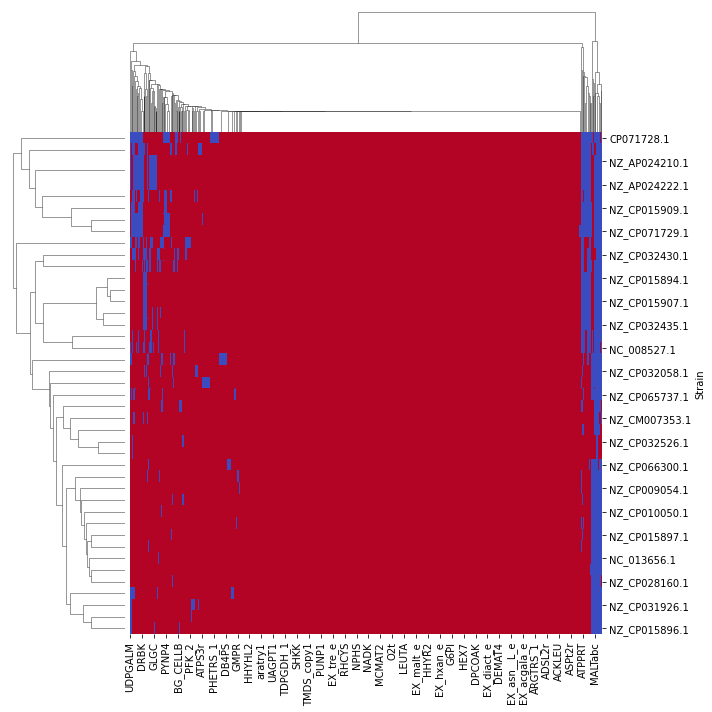

In [91]:
g = sns.clustermap(strains, cbar_pos=None, cmap = 'coolwarm')

In [92]:
# Let's perform gap-filling
gap_filled_models = []
failures = []
for x in strain_models:
    with suppress_stdout():
        try:
            sol = homology_gapfilling(x, [l_lactis_ref], integer_threshold = 1e-9,
                             force_exchange=True, force_transport=True)
            gap_filled_models.append(sol)
        except KeyError:
            gap_filled_models.append(None)
            failures.append(x.id)
            continue

'' is not a valid SBML 'SId'.
/home/fco/miniconda3/envs/TFM/lib/python3.8/site-packages/cobra/util/solver.py:430: UserWarning: solver status is 'infeasible'
  warn("solver status is '{}'".format(status), UserWarning)
'' is not a valid SBML 'SId'.
'' is not a valid SBML 'SId'.
'' is not a valid SBML 'SId'.
'' is not a valid SBML 'SId'.
'' is not a valid SBML 'SId'.
'' is not a valid SBML 'SId'.
'' is not a valid SBML 'SId'.
'' is not a valid SBML 'SId'.
'' is not a valid SBML 'SId'.
'' is not a valid SBML 'SId'.
'' is not a valid SBML 'SId'.
'' is not a valid SBML 'SId'.
'' is not a valid SBML 'SId'.
'' is not a valid SBML 'SId'.
'' is not a valid SBML 'SId'.
'' is not a valid SBML 'SId'.
'' is not a valid SBML 'SId'.
'' is not a valid SBML 'SId'.
'' is not a valid SBML 'SId'.
'' is not a valid SBML 'SId'.
'' is not a valid SBML 'SId'.
'' is not a valid SBML 'SId'.
'' is not a valid SBML 'SId'.
'' is not a valid SBML 'SId'.
'' is not a valid SBML 'SId'.
'' is not a valid SBML 'SId'.
'' 

In [93]:
failures

['NC_017949.1']

In [94]:
GF_F = [x.optimize().objective_value for x in strain_models]
GF_F

[0.8004907516581797,
 0.6192018466784912,
 0.5758620769089587,
 0.6493087778970227,
 0.6494779957900962,
 0.6134944498580516,
 0.649308777897018,
 0.8004907516581804,
 0.6492984936803537,
 0.7277941503126053,
 0.8004907516581795,
 0.8012069273844071,
 0.5673164453336872,
 0.6493087778970227,
 0.5683966981103387,
 0.0,
 0.5683966981103382,
 0.800490751658178,
 0.6493087778970227,
 0.0,
 0.8004907516581797,
 None,
 0.7495082323302026,
 0.6494677088932235,
 0.5668759727214255,
 0.5366576734211297,
 0.566875972721426,
 0.7815898078090185,
 0.8004907516581781,
 0.8004907516581784,
 0.800490751658178,
 0.8004907516581786,
 0.8012069273844183,
 0.8012069273843985,
 0.8004907516581792,
 0.801206927384401,
 0.6494677088932241,
 0.5698106597645688,
 0.8003219468448629,
 0.20115124826283703,
 0.8004907516581778,
 0.6494677088932239,
 0.0]

All models but 4 have been solved

In [95]:
# Let's count the quantity of reactions added by its type
gap_filled_models

[(<Model  at 0x7f1d890494f0>,
  {'iNF517': [('CLPNS_LLA', ['LLMG_RS07830']),
    ('GLNS', ['LLMG_RS12480']),
    ('PGGT2',
     ['LLMG_RS11990', 'LLMG_RS02600', 'LLMG_RS01845', 'LLMG_RS08445']),
    ('PRAIi', ['LLMG_RS05270']),
    ('SERTRS_1', ['LLMG_RS03735'])]}),
 (<Model  at 0x7f1dad804730>,
  {'iNF517': [('Transport reaction: GALt2', ['LLMG_RS11220']),
    ('Transport reaction: GLUABUTt7', ['LLMG_RS05965']),
    ('Transport reaction: MALt2r', ['LLMG_RS08245']),
    ('ANPRT', ['LLMG_RS05245']),
    ('ANS', ['LLMG_RS05235', 'LLMG_RS05240']),
    ('IGPS', ['LLMG_RS05265']),
    ('PGGT2',
     ['LLMG_RS01845', 'LLMG_RS11990', 'LLMG_RS02600', 'LLMG_RS08445']),
    ('RBK', ['LLMG_RS04050']),
    ('PRAIi', ['LLMG_RS05270']),
    ('TRPS1', ['LLMG_RS05280', 'LLMG_RS05285'])]}),
 (<Model  at 0x7f1d86745b20>,
  {'iNF517': [('Transport reaction: ARGabc',
     ['LLMG_RS02805', 'LLMG_RS09920', 'LLMG_RS09915']),
    ('Transport reaction: GALt2', ['LLMG_RS11220']),
    ('Transport reaction: GLCNt

Copying the output above into a tab and searching for "EX_" it was determined that no exchange reactions have been added.

In [98]:
R  = []
for M in gap_filled_models:
    try:
        R.append([ list(M[1].values())[0][x][0] for x in range(len(list(M[1].values())[0])) ])
    except IndexError:
        R.append([])
    except TypeError:
        R.append([])
        continue

In [100]:
len(R)

43

In [107]:
TR = []
OR = []
for i in range(len(R)):
    ct = 0
    co = 0
    if R[i] == []:
        TR.append(0)
        OR.append(0)
        continue
    for j in R[i]:
        if j.startswith('Transport'):
            ct += 1
        else:
            co += 1
    TR.append(ct)
    OR.append(co)

In [25]:
# making a new column
n_gf_reactions = []
for i in gap_filled_models:
    if i[1] == {}:
        n_gf_reactions.append(0)
    else:
        c = 0
        for j in i[1].keys():
            for k in i[1][j]:
                c += 1
        n_gf_reactions.append(c)

In [114]:
df['Transport Reactions Added'] = TR
df['Other Reaction Added'] = OR
df['Post-GF Flux'] = GF_F

In [115]:
df

,Strain,Flux Value,Number of Reactions,Transport Reactions Added,Other Reaction Added,Post-GF Flux
0,NZ_CP066300.1,0.000000,729,0,5,0.800491
1,NZ_CP015899.1,NaN,694,3,7,0.619202
2,NZ_CP015900.1,NaN,699,6,2,0.575862
3,NZ_AP018499.1,0.000000,693,3,2,0.649309
4,NC_020450.1,0.000000,735,0,2,0.649478
5,NZ_CP015894.1,NaN,716,1,2,0.613494
6,NZ_CP015901.1,0.000000,716,2,1,0.649309
7,NZ_LT599049.1,0.000000,732,0,2,0.800491
8,NC_008527.1,0.649298,706,4,0,0.649298
9,NZ_CP015902.1,0.000000,732,1,2,0.727794


In [119]:
# unsolved models
df.loc[df['Post-GF Flux'] == 0]

,Strain,Flux Value,Number of Reactions,Transport Reactions Added,Other Reaction Added,Post-GF Flux
15,NZ_CP070856.1,0.0,735,0,0,0.0
19,NZ_CP015896.1,0.0,726,0,0,0.0
42,NZ_CP053671.2,0.0,708,0,0,0.0


In [125]:
# plus
df.iloc[21]

Strain                       CP071728.1
Flux Value                          NaN
Number of Reactions                 669
Transport Reactions Added             0
Other Reaction Added                  0
Post-GF Flux                        NaN
Name: 21, dtype: object

In [126]:
# we'll try to solve these four using ModelSEED L. lactis models reconstructed from PATRIC
# we first need to do a search on PATRIC website
# https://patricbrc.org/view/GenomeList/?and(keyword(lactococcus),keyword(lactis)) 
# sorted by genome status, WGS first; 10 first IDs chosen (June 15; 21:15)
patric_ids = []
with open("patric_ids.txt", 'r') as f:
    for line in f:
        patric_ids.append(line.replace("\n", ""))
patric_ids

['1358.142',
 '1358.538',
 '1359.20',
 '1359.42',
 '1117941.3',
 '1358.50',
 '1359.39',
 '1360.89',
 '1149132.3',
 '1358.1193']

In [127]:
# ModelSEED URLs
mackinac.modelseed.ms_client.url = 'https://p3.theseed.org/services/ProbModelSEED/'
mackinac.workspace.ws_client.url = 'https://p3.theseed.org/services/Workspace'
mackinac.genome.patric_url = 'https://www.patricbrc.org/api/'

In [129]:
mackinac.get_token("fcomnozz")

patric password: ········


'fcomnozz@patricbrc.org'

In [130]:
# Loading tables for SEED-BiGG translation
Reactions_table = pd.read_csv("../gapfilling/seedtobigg/reactions.tsv", sep = "\t")
Metabolites_table = pd.read_csv("../gapfilling/seedtobigg/compounds.tsv", sep = "\t")

In [131]:
# Reconstructing, gap-filling and translating PATRIC models
# accessing June 19 2021, 22:39
ms_models = modelseed(patric_ids, R_table = Reactions_table, M_table = Metabolites_table)

Ignoring reaction 'EX_h2o_e' since it already exists.
Ignoring reaction 'EX_nh4_e' since it already exists.
Ignoring reaction 'EX_glyc_e' since it already exists.
Ignoring reaction 'EX_mg2_e' since it already exists.
Ignoring reaction 'EX_o2_e' since it already exists.
Ignoring reaction 'EX_h2o_e' since it already exists.
Ignoring reaction 'EX_nh4_e' since it already exists.
Ignoring reaction 'EX_glyc_e' since it already exists.
Ignoring reaction 'EX_mg2_e' since it already exists.
Ignoring reaction 'EX_o2_e' since it already exists.
Ignoring reaction 'EX_h2o_e' since it already exists.
Ignoring reaction 'EX_nh4_e' since it already exists.
Ignoring reaction 'EX_glyc_e' since it already exists.
Ignoring reaction 'EX_mg2_e' since it already exists.
Ignoring reaction 'EX_o2_e' since it already exists.
Ignoring reaction 'EX_h2o_e' since it already exists.
Ignoring reaction 'EX_nh4_e' since it already exists.
Ignoring reaction 'EX_glyc_e' since it already exists.
Ignoring reaction 'EX_mg2_e

In [132]:
ms_models

{'1358.142': <Model 1358.142 (translated) at 0x7f1d301957c0>,
 '1358.538': <Model 1358.538 (translated) at 0x7f1d31922b50>,
 '1359.20': <Model 1359.20 (translated) at 0x7f1d40048f40>,
 '1359.42': <Model 1359.42 (translated) at 0x7f1d3611bf70>,
 '1117941.3': <Model 1117941.3 (translated) at 0x7f1d3083ba30>,
 '1358.50': <Model 1358.50 (translated) at 0x7f1d30861a00>,
 '1359.39': <Model 1359.39 (translated) at 0x7f1d35deffa0>,
 '1360.89': <Model 1360.89 (translated) at 0x7f1d3a872a00>,
 '1149132.3': <Model 1149132.3 (translated) at 0x7f1d30c04eb0>,
 '1358.1193': <Model 1358.1193 (translated) at 0x7f1d2dfe1790>}

In [133]:
ms_templates = list(ms_models.values())

In [135]:
# USING THESE MODELS FOR THE UNSOLVED SAMPLES
unsolved_models = [strain_models[15], strain_models[19], strain_models[21], strain_models[42]]

In [137]:
ms_gapfilled_models = []
failures = []
for x in unsolved_models:
    with suppress_stdout():
        try:
            sol = homology_gapfilling(x, ms_templates, integer_threshold = 1e-9,
                             force_exchange=True, force_transport=True, use_all_templates=True)
            ms_gapfilled_models.append(sol)
        except KeyError:
            ms_gapfilled_models.append(None)
            failures.append(x.id)
            continue

/home/fco/miniconda3/envs/TFM/lib/python3.8/site-packages/cobra/util/solver.py:430: UserWarning: solver status is 'infeasible'
  warn("solver status is '{}'".format(status), UserWarning)


In [139]:
ms_gapfilled_models

[(<Model NZ_CP070856.1 at 0x7f1d42fbda60>, {}),
 (<Model NZ_CP015896.1 at 0x7f1dbae30670>, {}),
 (<Model CP071728.1 at 0x7f1d8aae5370>, {}),
 (<Model NZ_CP053671.2 at 0x7f1d81be07c0>, {})]

In [140]:
failures

[]

In [142]:
# Lets create a bar plot with the number of added reactions
print(df['Transport Reactions Added'].sum(), df['Other Reaction Added'].sum())

65 84


In [143]:
rt = ['Transport', 'Exchange', 'Other']
n_r = [65,0,84]

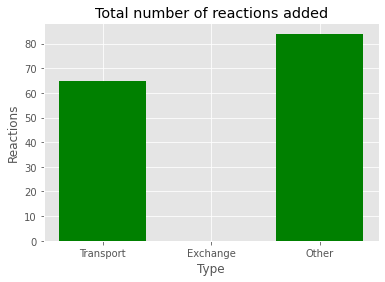

In [193]:
fig = plt.figure()
plt.style.use('ggplot')
x_pos = [i for i, _ in enumerate(rt)]

plt.bar(x_pos, n_r, color = 'green')
plt.xlabel("Type")
plt.ylabel("Reactions")
plt.title("Total number of reactions added")

plt.xticks(x_pos, rt)

plt.savefig('barplot.png')

In [152]:
# let's 
R

[['CLPNS_LLA', 'GLNS', 'PGGT2', 'PRAIi', 'SERTRS_1'],
 ['Transport reaction: GALt2',
  'Transport reaction: GLUABUTt7',
  'Transport reaction: MALt2r',
  'ANPRT',
  'ANS',
  'IGPS',
  'PGGT2',
  'RBK',
  'PRAIi',
  'TRPS1'],
 ['Transport reaction: ARGabc',
  'Transport reaction: GALt2',
  'Transport reaction: GLCNt2ir',
  'Transport reaction: GLYC3Pt6',
  'Transport reaction: MALt2r',
  'Transport reaction: XANt2',
  'PGGT2',
  'RBK'],
 ['Transport reaction: AEPabc',
  'Transport reaction: GLCNt2ir',
  'Transport reaction: GLUABUTt7',
  'PGGT2',
  'RBK'],
 ['PGGT2', 'PRAIi'],
 ['Transport reaction: ARGabc', 'G5SD', 'PGGT2'],
 ['Transport reaction: GLCNt2ir', 'Transport reaction: MALt2r', 'PGGT2'],
 ['PGGT2', 'PRAIi'],
 ['Transport reaction: AEPabc',
  'Transport reaction: GLCNt2ir',
  'Transport reaction: MALt2r',
  'Transport reaction: SO4t2'],
 ['Transport reaction: GLUABUTt7', 'PGGT2', 'PRAIi'],
 ['PGGT2', 'PRAIi'],
 ['Transport reaction: MALt2r', 'DALTAL_LLA', 'PIabc'],
 ['Transpor

In [153]:
allR = []
for i in R:
    allR.extend(i)

In [151]:
import collections

In [157]:
counter = collections.Counter(allR)
counter

Counter({'CLPNS_LLA': 1,
         'GLNS': 1,
         'PGGT2': 34,
         'PRAIi': 18,
         'SERTRS_1': 1,
         'Transport reaction: GALt2': 4,
         'Transport reaction: GLUABUTt7': 7,
         'Transport reaction: MALt2r': 10,
         'ANPRT': 1,
         'ANS': 2,
         'IGPS': 1,
         'RBK': 9,
         'TRPS1': 1,
         'Transport reaction: ARGabc': 6,
         'Transport reaction: GLCNt2ir': 16,
         'Transport reaction: GLYC3Pt6': 3,
         'Transport reaction: XANt2': 2,
         'Transport reaction: AEPabc': 7,
         'G5SD': 1,
         'Transport reaction: SO4t2': 4,
         'DALTAL_LLA': 1,
         'PIabc': 2,
         'Transport reaction: ILEt2r_copy2': 2,
         'Transport reaction: LEUt2r_copy2': 2,
         'Transport reaction: VALt2r_copy2': 2,
         'ORNCD_1': 5,
         'ILETRS_1': 1,
         'ALCD2x': 1,
         'CYTK1': 1,
         'FBA': 2,
         'CTPS1': 1})

In [158]:
print(len(allR), len(counter))

149 31


In [159]:
allR = list(set(allR))
allR

['Transport reaction: XANt2',
 'DALTAL_LLA',
 'Transport reaction: VALt2r_copy2',
 'ANS',
 'FBA',
 'SERTRS_1',
 'TRPS1',
 'GLNS',
 'Transport reaction: GLCNt2ir',
 'Transport reaction: GALt2',
 'Transport reaction: LEUt2r_copy2',
 'G5SD',
 'ORNCD_1',
 'RBK',
 'ANPRT',
 'IGPS',
 'PGGT2',
 'Transport reaction: AEPabc',
 'Transport reaction: SO4t2',
 'Transport reaction: MALt2r',
 'ILETRS_1',
 'CLPNS_LLA',
 'Transport reaction: GLYC3Pt6',
 'PIabc',
 'Transport reaction: ILEt2r_copy2',
 'Transport reaction: ARGabc',
 'ALCD2x',
 'Transport reaction: GLUABUTt7',
 'PRAIi',
 'CTPS1',
 'CYTK1']

In [161]:
len(R)

43

In [163]:
Lists = []
for i in range(len(allR)):
    L = []
    for j in R:
        if allR[i] in j:
            L.append(1)
        else:
            L.append(0)
    Lists.append(L)
len(Lists)

31

In [164]:
len(Lists[0])

43

In [167]:
strains_cm = pd.DataFrame(df['Strain'].copy())

In [169]:
for i in range(len(allR)):
    strains_cm[allR[i]] = Lists[i]
strains_cm

,Strain,Transport reaction: XANt2,DALTAL_LLA,Transport reaction: VALt2r_copy2,ANS,FBA,SERTRS_1,TRPS1,GLNS,Transport reaction: GLCNt2ir,...,CLPNS_LLA,Transport reaction: GLYC3Pt6,PIabc,Transport reaction: ILEt2r_copy2,Transport reaction: ARGabc,ALCD2x,Transport reaction: GLUABUTt7,PRAIi,CTPS1,CYTK1
0,NZ_CP066300.1,0,0,0,0,0,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
1,NZ_CP015899.1,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0
2,NZ_CP015900.1,1,0,0,0,0,0,0,0,1,...,0,1,0,0,1,0,0,0,0,0
3,NZ_AP018499.1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,NC_020450.1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,NZ_CP015894.1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6,NZ_CP015901.1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7,NZ_LT599049.1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8,NC_008527.1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9,NZ_CP015902.1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [171]:
strains_cm.index = strains_cm['Strain']

In [172]:
del strains_cm['Strain']

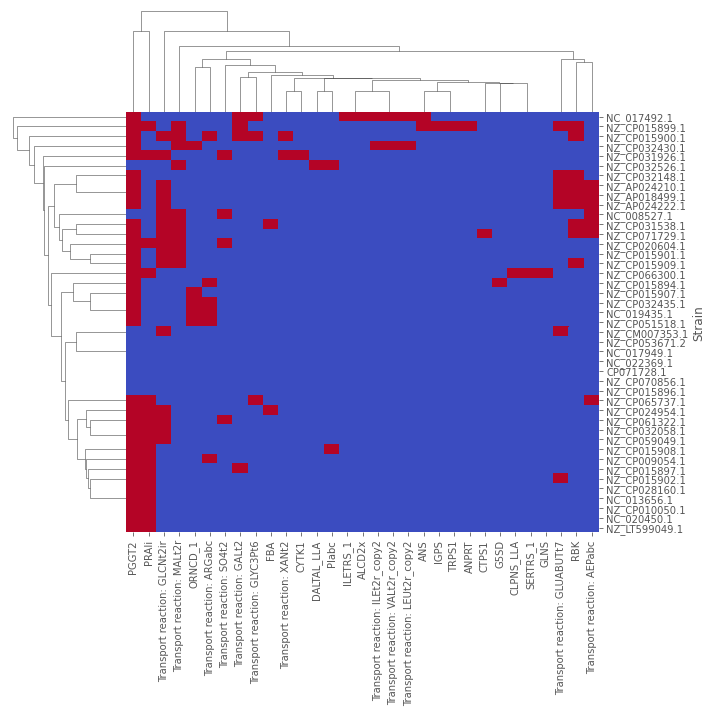

In [174]:
g = sns.clustermap(strains_cm, cbar_pos=None, cmap = 'coolwarm', yticklabels=True)

In [198]:
counter.most_common(10)

[('PGGT2', 34),
 ('PRAIi', 18),
 ('Transport reaction: GLCNt2ir', 16),
 ('Transport reaction: MALt2r', 10),
 ('RBK', 9),
 ('Transport reaction: GLUABUTt7', 7),
 ('Transport reaction: AEPabc', 7),
 ('Transport reaction: ARGabc', 6),
 ('ORNCD_1', 5),
 ('Transport reaction: GALt2', 4)]

In [199]:
# Now let's make a barplot with top 10 added reactions
names = []
number = []
for i in counter.most_common(10):
    names.append(i[0].replace('Transport reaction: ', ''))
    number.append(i[1])
print(names, number)

['PGGT2', 'PRAIi', 'GLCNt2ir', 'MALt2r', 'RBK', 'GLUABUTt7', 'AEPabc', 'ARGabc', 'ORNCD_1', 'GALt2'] [34, 18, 16, 10, 9, 7, 7, 6, 5, 4]


Text(0.5, 1.0, 'Top 10 Added Reactions')

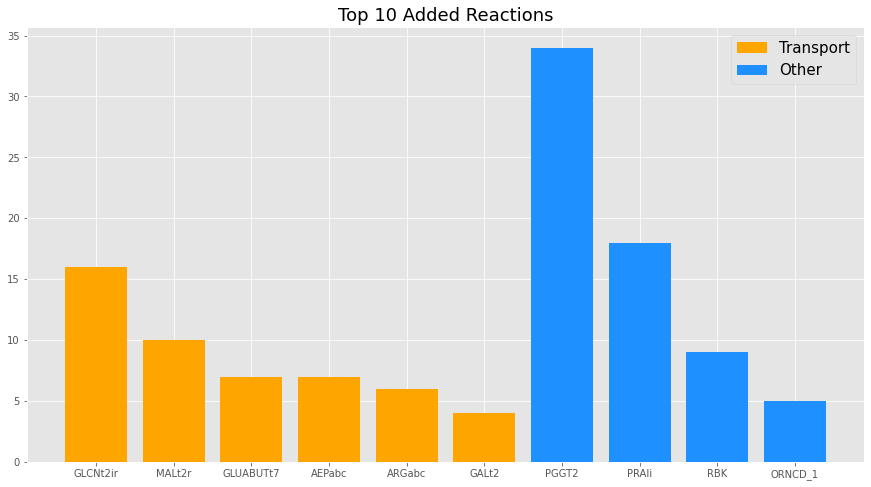

In [216]:
fig, ax = plt.subplots(figsize=(15,8))
plt.bar([names[i] for i in [2,3,5,6,7,9]], [number[i] for i in [2,3,5,6,7,9]], color = 'orange', label = 'Transport')
plt.bar([names[i] for i in [0,1,4,8]], [number[i] for i in [0,1,4,8]], color = 'dodgerblue', label = 'Other')
ax.legend(fontsize=15)
plt.title('Top 10 Added Reactions', fontsize=18)
plt

In [466]:
# saving tables
df.to_csv('general_table.tsv', sep = '\t', index=False)

In [467]:
gf_df.to_csv('gf_table.tsv', sep = '\t', index=False)
ms_df.to_csv('ms_table.tsv', sep = '\t', index=False)